General Data Summary:
Number of Customers: 200
Number of Products: 100
Number of Transactions: 1000

Customers Data Summary:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products Data Summary:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Transactions Data Summary:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.

C:\Users\Sudeep\AppData\Local\Temp\ipykernel_21580\3721214497.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_selling_products.values, y=top_selling_products_names, palette='viridis')


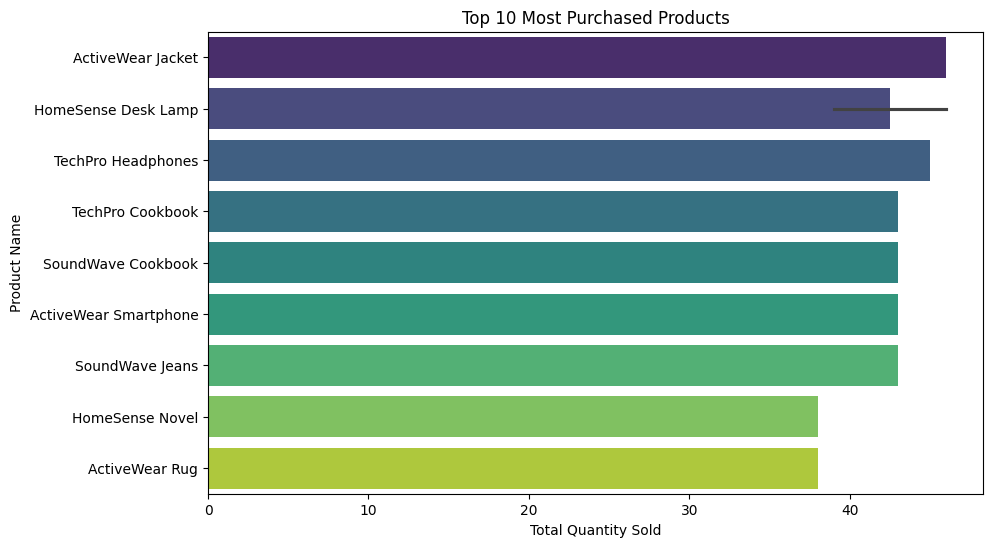

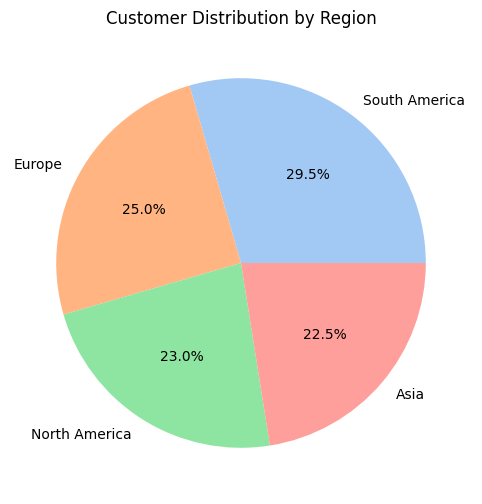

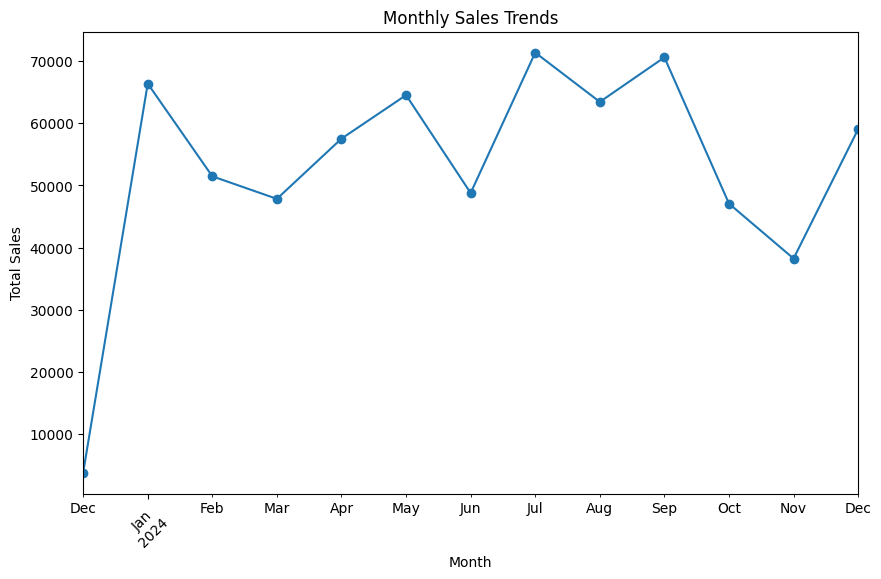

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
customers = pd.read_csv('data/Customers.csv')
products = pd.read_csv('data/Products.csv')
transactions = pd.read_csv('data/Transactions.csv')

# Function 1: General Data Summary
def get_data_summary():
    """
    Provides general statistics and summary of the Customers, Products, and Transactions datasets.
    """
    summary = {
        "Number of Customers": customers.shape[0],
        "Number of Products": products.shape[0],
        "Number of Transactions": transactions.shape[0],
    }
    
    # Data Summary for each dataset
    customers_summary = customers.describe()
    products_summary = products.describe()
    transactions_summary = transactions.describe()

    print("General Data Summary:")
    print(f"Number of Customers: {summary['Number of Customers']}")
    print(f"Number of Products: {summary['Number of Products']}")
    print(f"Number of Transactions: {summary['Number of Transactions']}")
    print("\nCustomers Data Summary:")
    print(customers_summary)
    print("\nProducts Data Summary:")
    print(products_summary)
    print("\nTransactions Data Summary:")
    print(transactions_summary)

# Function 2: Number of Unique Customers, Products, and Transactions
def get_unique_counts():
    """
    Returns the count of unique Customers, Products, and Transactions.
    """
    num_customers = customers['CustomerID'].nunique()
    num_products = products['ProductID'].nunique()
    num_transactions = transactions['TransactionID'].nunique()

    print("\nUnique Counts:")
    print(f"Number of Unique Customers: {num_customers}")
    print(f"Number of Unique Products: {num_products}")
    print(f"Number of Transactions: {num_transactions}")

# Function 3: Top-Selling Products
def get_top_selling_products():
    """
    Plots a bar chart for the top 10 most purchased products.
    """
    top_selling_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
    top_selling_products_names = products[products['ProductID'].isin(top_selling_products.index)]['ProductName']
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_selling_products.values, y=top_selling_products_names, palette='viridis')
    plt.title('Top 10 Most Purchased Products')
    plt.xlabel('Total Quantity Sold')
    plt.ylabel('Product Name')
    plt.show()

# Function 4: Regional Market Share
def get_regional_market_share():
    """
    Plots a pie chart for the customer distribution by region.
    """
    customer_distribution = customers['Region'].value_counts()

    plt.figure(figsize=(8, 6))
    plt.pie(customer_distribution, labels=customer_distribution.index, autopct='%1.1f%%', colors=sns.color_palette("pastel", len(customer_distribution)))
    plt.title('Customer Distribution by Region')
    plt.show()

# Function 5: Seasonal Sales Trends
def get_seasonal_sales_trends():
    """
    Plots a line graph for monthly sales trends.
    """
    transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
    monthly_sales = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

    plt.figure(figsize=(10, 6))
    monthly_sales.plot(kind='line', marker='o')
    plt.title('Monthly Sales Trends')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.show()

# Call all functions in order to display the results
get_data_summary()
get_unique_counts()
get_top_selling_products()
get_regional_market_share()
get_seasonal_sales_trends()
